21/Agosto/2025

*Ángela Valentina Bustos Giraldo* , *Mariana Montoya Torres*

<h1>RAYOS X</h1>

<h4>Datos de Calibración:</h4>

<p>Se utilizó un crital de LiF con una distancia (d) intermolecular de <b>201 pm</b> para el primer y segundo día de toma de datos.  </p>

<p>Respecto a los ángulos para la máxima intensidad se obtuvieron dos distintos para los dos días de toma de datos. En el primer día se obtuvo máxima intensidad en un ángulo de <b>20,9°</b> con una diferencia de 1,7° del valor esperado en la guía y para el segundo día se obtuvo máxima intensidad en un ángulo de <b>20,8°</b> con una diferencia de 1,8° del valor esperado en la guía. </p>

El objetivo del experimento es analizar el comportamiento de los rayos X y verificar sus propiedades. Para esto se realizan diferentes mediciones como medir el espectro del cobre usando el cristal LiF, su atenuación, 


<h4> Procesamiento de toma de datos </h4>

In [13]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

def leer_columnas(path_archivo):
    columnas = []

    with open(Path(path_archivo), "r", encoding="latin-1", errors="ignore") as f:
        for linea in f:
            partes = linea.strip().replace(",", ".").split()
            try:
                fila = [float(x) for x in partes]
                # inicializa las listas de columnas si es la primera fila
                if not columnas:
                    columnas = [[] for _ in range(len(fila))]
                # agrega cada valor a su columna correspondiente
                for i, val in enumerate(fila):
                    columnas[i].append(val)
            except ValueError:
                # ignora filas con datos no numéricos
                continue

    return columnas


<h3>Actividad 1:</h3>
<p>Gráficar intensidad contra longitud de onda utilizando la ley de Bragg.</p>

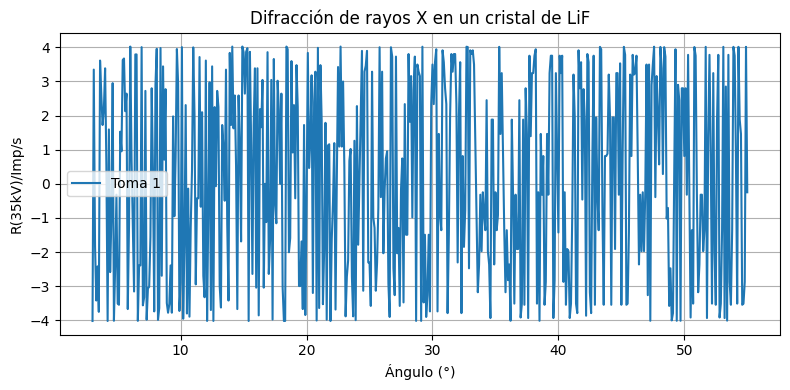

In [14]:
import math

act_1 = leer_columnas("250821_Actividad1_RayosX_Toma1.txt")
n= 1
lambda_bragg = []
for i in act_1[1]:
    lambda_= 2 *201e-12 * math.sin(i) * (1/n)
    lambda_bragg.append(lambda_ * 1e10)  # Convertir a Angstroms
plt.figure(figsize=(8, 4))

plt.plot(act_1[0], lambda_bragg, label="Toma 1")
plt.legend()

plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.show()


<h4> Conclusiones iniciales </h4>

Hehe

<h3> Actividad 2:</h3>

La absorción de los rayos X usando la relación μ/ρ . A lo largo de la práctica se varía el espesor de cada material, Al y Zn en este caso.


<p>Ángulo Intensidad Máxima : 20,9 °. d del LiF = 201 pm. Con unos absorvedores de Al de 0,1 mm, 0,08 mm y 0,06 mm ,para la primera toma de datos.</p>

<p> Ángulo Intensidad Máxima : 20,7°. d del LiF = 201 pm. Con unos absorvedores de Al de 0,02 mm y 0,04 mm; Zn de 0,075 mm, 0,025nm. para la segunda toma de datos</p> 

In [15]:
act_2_1 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida1.txt") # Al 0,1 mm 
act_2_2  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida2.txt")  #Al 0,08 mm
act_2_3  = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida3.txt")  #Al 0,06 mm
act_2_4 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida4.txt")  #Al 0,02 mm
act_2_5 = leer_columnas("250821_Actividad2_RayosX_Toma1_Medida5.txt")  #Al 0,04 mm

act_2_6 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida6.txt")  #Zn 0,075 mm
act_2_7 =  leer_columnas("250821_Actividad2_RayosX_Toma1_Medida7.txt")  #Zn 0,025 mm


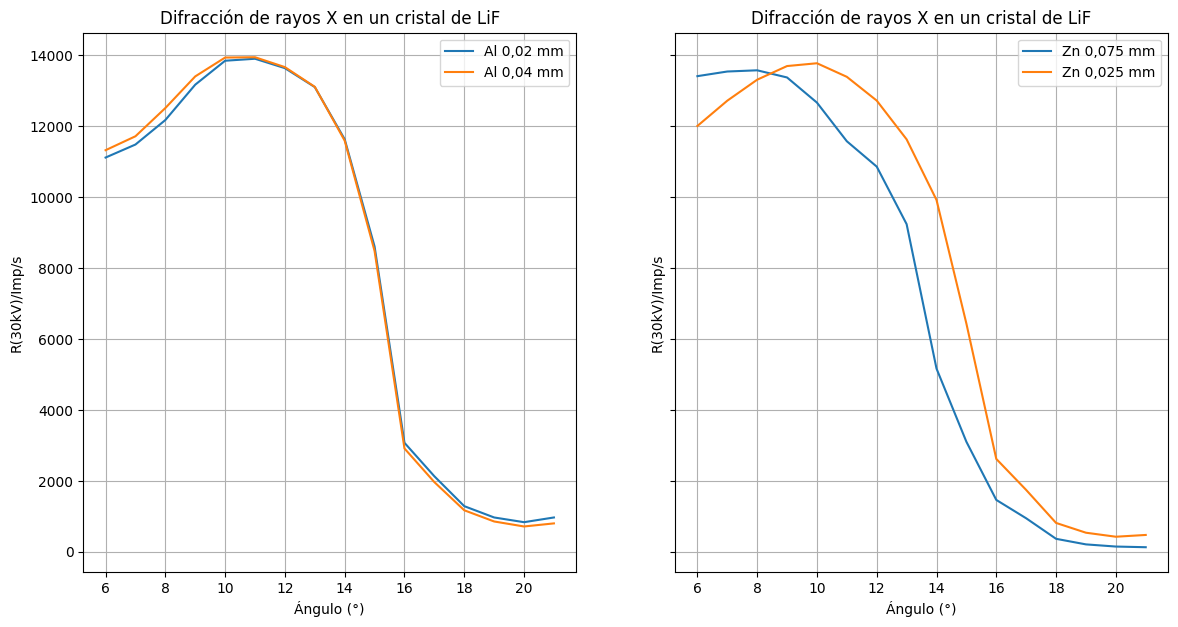

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 7), sharey=True)

ax1.set_xlabel("Ángulo (°)")
ax1.set_ylabel("R(30kV)/Imp/s")
ax1.set_title("Difracción de rayos X en un cristal de LiF")
ax1.grid(True)
ax1.plot(act_2_4[0], act_2_4[1], label="Al 0,02 mm")
ax1.plot(act_2_5[0], act_2_5[1], label="Al 0,04 mm")
ax1.legend()    

ax2.set_xlabel("Ángulo (°)")
ax2.set_ylabel("R(30kV)/Imp/s")
ax2.set_title("Difracción de rayos X en un cristal de LiF")
ax2.grid(True)
ax2.plot(act_2_6[0], act_2_6[1], label="Zn 0,075 mm")
ax2.plot(act_2_7[0], act_2_7[1], label="Zn 0,025 mm")
ax2.legend()    


Gráfica de regresiones logaritmicas de Intensidad contra espesor para AI y Zn

C:\Users\Flutt\AppData\Local\Temp\ipykernel_34500\769940428.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_Zn, pcov_Zn = curve_fit(linear_function, d_Zn, lnI_Zn)


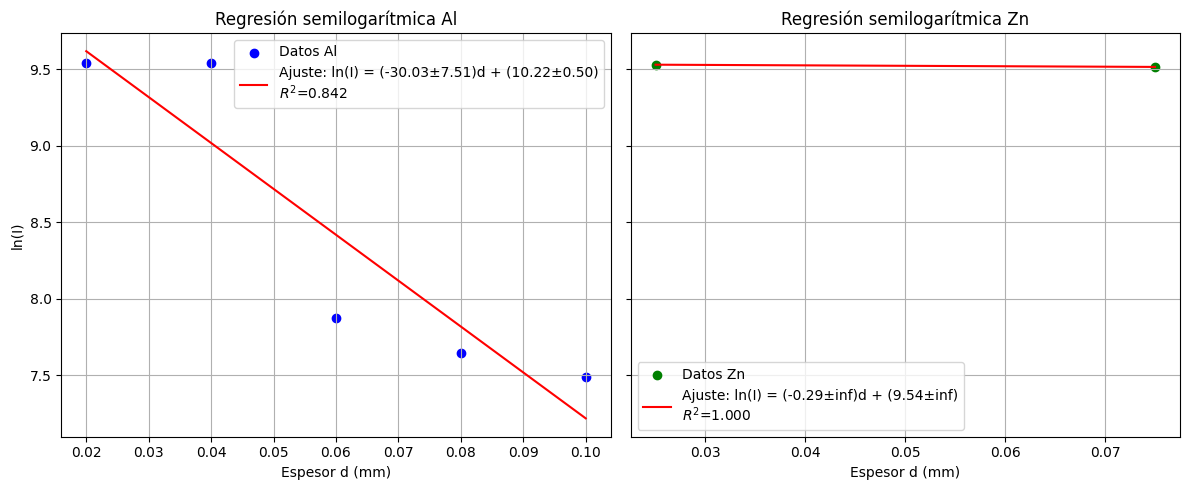

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --------------------------
# Función lineal para el ajuste
# --------------------------
def linear_function(x, a, b):
    return a * x + b

# --------------------------
# Extraer intensidades máximas de cada conjunto
# --------------------------
# Al
d_Al = np.array([0.10, 0.08, 0.06, 0.04, 0.02])  # espesores [mm]
Imax_Al = np.array([
    np.max(act_2_1[1]),
    np.max(act_2_2[1]),
    np.max(act_2_3[1]),
    np.max(act_2_4[1]),
    np.max(act_2_5[1])
])
lnI_Al = np.log(Imax_Al)

# Zn
d_Zn = np.array([0.075, 0.025])  # espesores [mm]
Imax_Zn = np.array([
    np.max(act_2_6[1]),
    np.max(act_2_7[1])
])
lnI_Zn = np.log(Imax_Zn)

# --------------------------
# Ajustes lineales
# --------------------------
# Al
popt_Al, pcov_Al = curve_fit(linear_function, d_Al, lnI_Al)
slope_Al, intercept_Al = popt_Al
slope_err_Al, intercept_err_Al = np.sqrt(np.diag(pcov_Al))
residuals_Al = lnI_Al - linear_function(d_Al, *popt_Al)
r2_Al = 1 - np.sum(residuals_Al**2) / np.sum((lnI_Al - np.mean(lnI_Al))**2)

# Zn
popt_Zn, pcov_Zn = curve_fit(linear_function, d_Zn, lnI_Zn)
slope_Zn, intercept_Zn = popt_Zn
slope_err_Zn, intercept_err_Zn = np.sqrt(np.diag(pcov_Zn))
residuals_Zn = lnI_Zn - linear_function(d_Zn, *popt_Zn)
r2_Zn = 1 - np.sum(residuals_Zn**2) / np.sum((lnI_Zn - np.mean(lnI_Zn))**2)

# --------------------------
# Graficar ln(I) vs d
# --------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Al ---
ax1.scatter(d_Al, lnI_Al, color='blue', label='Datos Al')
ax1.plot(d_Al, linear_function(d_Al, *popt_Al), color='red',
         label=f'Ajuste: ln(I) = ({slope_Al:.2f}±{slope_err_Al:.2f})d + ({intercept_Al:.2f}±{intercept_err_Al:.2f})\n$R^2$={r2_Al:.3f}')
ax1.set_xlabel("Espesor d (mm)")
ax1.set_ylabel("ln(I)")
ax1.set_title("Regresión semilogarítmica Al")
ax1.grid(True)
ax1.legend()

# --- Zn ---
ax2.scatter(d_Zn, lnI_Zn, color='green', label='Datos Zn')
ax2.plot(d_Zn, linear_function(d_Zn, *popt_Zn), color='red',
         label=f'Ajuste: ln(I) = ({slope_Zn:.2f}±{slope_err_Zn:.2f})d + ({intercept_Zn:.2f}±{intercept_err_Zn:.2f})\n$R^2$={r2_Zn:.3f}')
ax2.set_xlabel("Espesor d (mm)")
ax2.set_title("Regresión semilogarítmica Zn")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


Tablas con incertidumbre de AI y Zn

In [27]:
def calcular_incertidumbre(datos):
    datos = np.array(datos)   
    intensidades = datos[:, 1]
    Imax = np.max(intensidades)
    dI = np.std(intensidades)
    return Imax, dI

# -----------------------------
# Espesores y materiales
# -----------------------------
muestras = [
    ("Aluminio", 0.10, act_2_1),
    ("Aluminio", 0.08, act_2_2),
    ("Aluminio", 0.06, act_2_3),
    ("Aluminio", 0.04, act_2_5),
    ("Aluminio", 0.02, act_2_4),
    ("Zinc", 0.075, act_2_6),
    ("Zinc", 0.025, act_2_7),
]

# -----------------------------
# Construir DataFrame
# -----------------------------
datos_tabla = []
for material, espesor, datos in muestras:
    Imax, dI = calcular_incertidumbre(datos)
    datos_tabla.append({
        "Material": material,
        "Espesor [mm]": espesor,
        "Imax": Imax,
        "Incertidumbre": dI
    })

df = pd.DataFrame(datos_tabla)
print(df)

   Material  Espesor [mm]     Imax  Incertidumbre
0  Aluminio         0.100    404.0          198.5
1  Aluminio         0.080    457.0          225.0
2  Aluminio         0.060    516.0          254.5
3  Aluminio         0.040  11720.0         5856.5
4  Aluminio         0.020  11487.0         5740.0
5      Zinc         0.075  13546.0         6769.5
6      Zinc         0.025  12723.0         6358.0


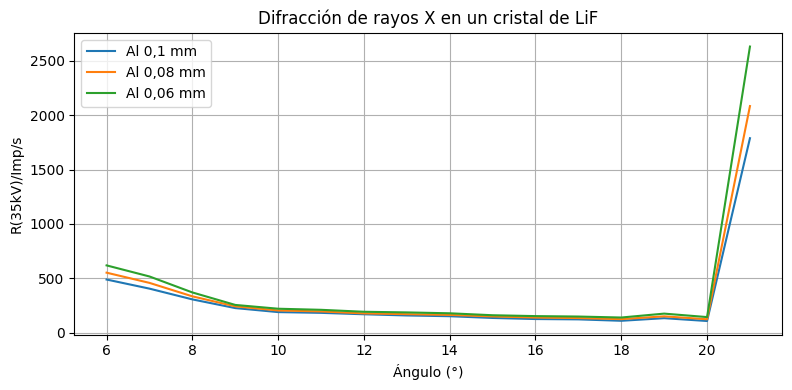

In [7]:
plt.figure(figsize=(8, 4))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_2_1[0], act_2_1[1], label="Al 0,1 mm ")
plt.plot(act_2_2[0], act_2_2[1], label="Al 0,08 mm")
plt.plot(act_2_3[0], act_2_3[1], label="Al 0,06 mm")
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>

Hehe

<h3>Actividad 3: </h3>

<p> 1. Se variar el voltaje de (11,35) kV variando de a 2kV, corriente (una se deja constante) con el valor de 1mA y con ángulo variante entre (19°,24°) con un aumento de 0,1°.</p>

<p> 2. Se variar la corriente (0,1,1)mA variando de a 0,1 mA, un voltaje constante de 35 kV y con ángulo variante entre (19°,24°) con un aumento de 0,1°. </p>

In [8]:
act_3_1 = leer_columnas("250821_Actividad3_RayosX_Toma1.txt") # Voltaje Variando
act_3_2 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida1.txt") # Corriente Variando 0,1 mA
act_3_3 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida2.txt") # Corriente Variando 0,5 mA
act_3_4 = leer_columnas("250821_Actividad3_RayosX_Toma1_Medida3.txt") # Corriente Variando 0, 8mA

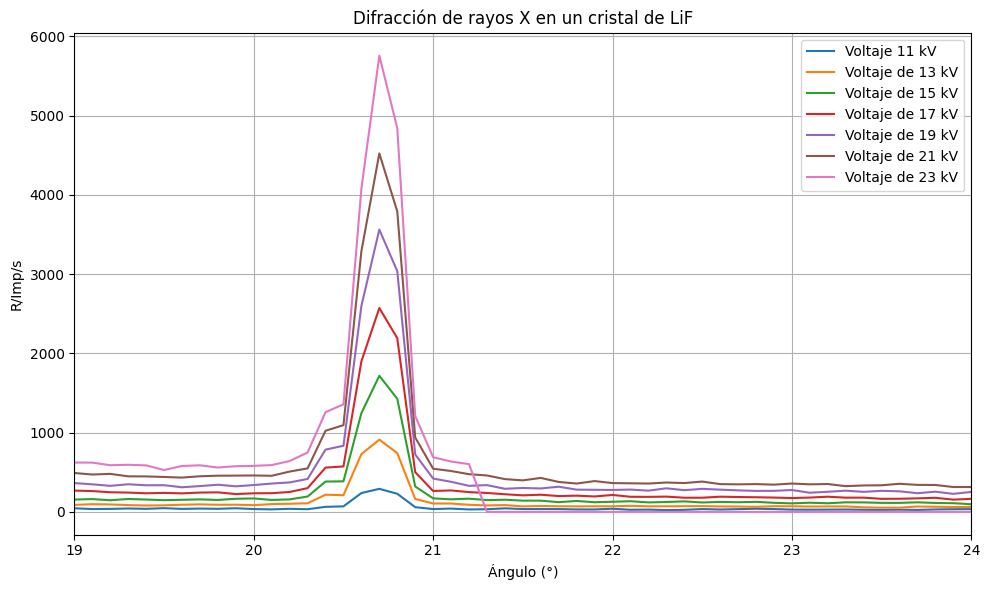

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(act_3_1[0], act_3_1[1], label="Voltaje 11 kV")
plt.plot(act_3_1[0], act_3_1[2], label="Voltaje de 13 kV")
plt.plot(act_3_1[0], act_3_1[3], label="Voltaje de 15 kV")
plt.plot(act_3_1[0], act_3_1[4], label="Voltaje de 17 kV")
plt.plot(act_3_1[0], act_3_1[5], label="Voltaje de 19 kV")
plt.plot(act_3_1[0], act_3_1[6], label="Voltaje de 21 kV")
plt.plot(act_3_1[0], act_3_1[7], label="Voltaje de 23 kV")
#plt.plot(act_3_1[0], act_3_1[8], label="Voltaje de 25 kV")
#plt.plot(act_3_1[0], act_3_1[9], label="Voltaje de 27 kV")
#plt.plot(act_3_1[0], act_3_1[10], label="Voltaje de 29 kV")
#plt.plot(act_3_1[0], act_3_1[11], label="Voltaje de 31 kV")
#plt.plot(act_3_1[0], act_3_1[12], label="Voltaje de 33 kV")
#plt.plot(act_3_1[0], act_3_1[13], label="Voltaje de 35 kV")

plt.xlim(19,24)
plt.title("Difracción de rayos X en un cristal de LiF")
plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

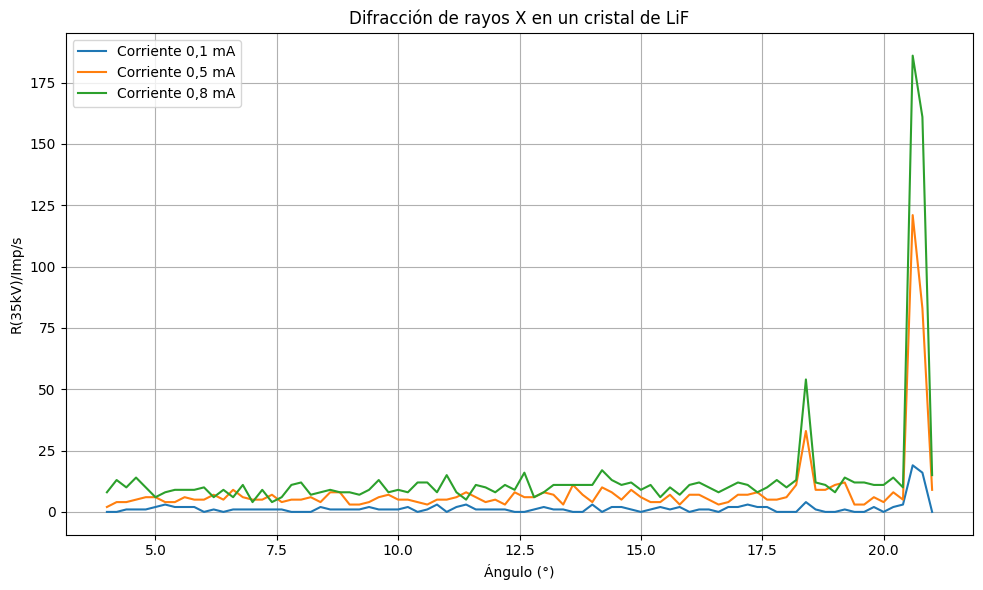

In [10]:
plt.figure(figsize=(10, 6))
plt.xlabel("Ángulo (°)")
plt.ylabel("R(35kV)/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)

plt.plot(act_3_2[0], act_3_2[1], label="Corriente 0,1 mA")
plt.plot(act_3_3[0], act_3_3[1], label="Corriente 0,5 mA")
plt.plot(act_3_4[0], act_3_4[1], label="Corriente 0,8 mA")
plt.legend()
plt.show()



<h4> Conclusiones iniciales </h4>

La gráfica de voltaje variante y corriente constante se descartaron los voltajes de 25 kV al 35 kV ya que no aportaban información valiosa al ser constantemente 0.

<h3>Actividad 4: </h3>
<p> Para esta parte de la práctica se comprueba la ley de Duane - Hunt hallando la longitud de onda mínima en la cuál se da el efecto de Bremsstrah-lung. </p>

<p>Ángulo variante de (4,21)°, voltaje variante (13, 35) kV con pasos de 2kV y corriente 1mA fija. </p>

In [11]:
act_4_1 = leer_columnas("250821_Actividad4_RayosX_Toma1.txt")

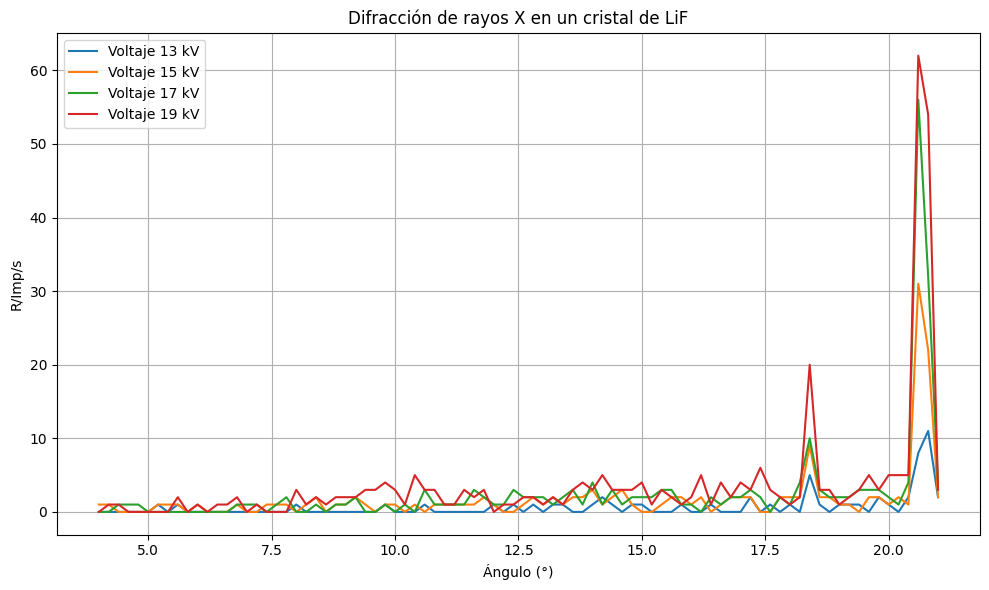

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(act_4_1[0], act_4_1[1], label="Voltaje 13 kV")
plt.plot(act_4_1[0], act_4_1[2], label="Voltaje 15 kV")
plt.plot(act_4_1[0], act_4_1[3], label="Voltaje 17 kV")
plt.plot(act_4_1[0], act_4_1[4], label="Voltaje 19 kV")
#plt.plot(act_4_1[0], act_4_1[5], label="Voltaje 21 kV")
#plt.plot(act_4_1[0], act_4_1[6], label="Voltaje 23 kV")
#plt.plot(act_4_1[0], act_4_1[7], label="Voltaje 25 kV")
#plt.plot(act_4_1[0], act_4_1[8], label="Voltaje 27 kV")
#plt.plot(act_4_1[0], act_4_1[9], label="Voltaje 29 kV")
#plt.plot(act_4_1[0], act_4_1[10], label="Voltaje 31 kV")
#plt.plot(act_4_1[0], act_4_1[11], label="Voltaje 33 kV")
#plt.plot(act_4_1[0], act_4_1[12], label="Voltaje 35 kV") 

plt.xlabel("Ángulo (°)")
plt.ylabel("R/Imp/s")
plt.title("Difracción de rayos X en un cristal de LiF")
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

<h4> Conclusiones iniciales </h4>


Se descartó los voltaje del 21kV a 35 kV debido a que no  aportaba información valiosa al ser constantemente 0. 